# Working with brainsight module

In [43]:
from pynetstim.brainsight import BrainsightProject, chunk_samples, plot_chunks
from pynetstim.plotting import plotting_points
from pynetstim.coordinates import FreesurferCoords
from pynetstim.freesurfer_files import Surf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

## Brainsight project

In [2]:
subject = 'example_subject'
base_dir = os.path.abspath('./data/example_data')
freesurfer_dir = os.path.join(base_dir,'freesurfer')
project_dir = os.path.join(base_dir,'pynetstim_output')
brainsight_file = os.path.join(base_dir, 'brainsight_raw/brainsight.txt'.format(subject=subject))

project = BrainsightProject(subject, freesurfer_dir = freesurfer_dir,
                      project_dir= project_dir, 
                      brainsight_file = brainsight_file)

#project.summary(plot_pulses=True,overwrite=True,heightpx=250,widthpx=900)

Target
Sample
Electrode
Planned
Session


#### samples and targets

In [27]:
targets = project.brainsight_targets.to_freesurfer_coords()

In [28]:
coords_df = targets.get_coords_df(subset_by='name',subset_vals=['L_LDLPFC'])
coords_df.head()

,ras_coord_X,ras_coord_Y,ras_coord_Z,voxel_coord_X,voxel_coord_Y,voxel_coord_Z,ras_tkr_coord_X,ras_tkr_coord_Y,ras_tkr_coord_Z,fsvoxel_coord_X,fsvoxel_coord_Y,fsvoxel_coord_Z,talairach_coord_X,talairach_coord_Y,talairach_coord_Z
L_LDLPFC,-22.315,55.8,60.261,151.0,80.0,108.0,-21.845998,45.13902,24.607191,150.0,103.0,173.0,-29.165642,30.586567,47.898679


In [29]:
### getting samples
stim_samples = samples.get_target_stims('L_LDLPFC')
stim_samples.head()

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment,emg_channels
259,Sample 260,Session 1,260,L_LDLPFC,-31.195,74.984,82.306,0.174,-0.699,0.693,...,3.693,1.938,(null),2018-07-27,15:47:06.277,TTL2,Snazzy Coil,0.0,(null),(null)
260,Sample 261,Session 1,261,L_LDLPFC,-30.516,74.276,82.199,0.222,-0.684,0.695,...,2.001,4.793,(null),2018-07-27,15:47:11.310,TTL2,Snazzy Coil,0.0,(null),(null)
261,Sample 262,Session 1,262,L_LDLPFC,-31.645,73.941,82.070,0.251,-0.677,0.692,...,1.623,6.459,(null),2018-07-27,15:47:15.357,TTL2,Snazzy Coil,0.0,(null),(null)
262,Sample 263,Session 1,263,L_LDLPFC,-30.878,74.808,82.116,0.200,-0.715,0.669,...,0.253,2.851,(null),2018-07-27,15:47:18.387,TTL2,Snazzy Coil,0.0,(null),(null)
263,Sample 264,Session 1,264,L_LDLPFC,-32.253,73.811,82.819,0.192,-0.730,0.656,...,0.877,2.035,(null),2018-07-27,15:47:21.432,TTL2,Snazzy Coil,0.0,(null),(null)


Text(0, 0.5, 'Stim Target Error')

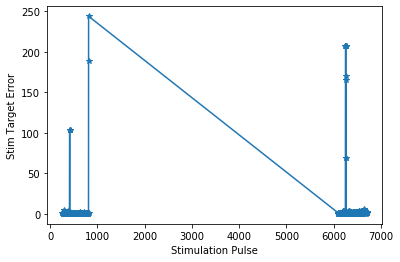

In [42]:
### plotting samples target errors
fig,ax = plt.subplots()
ax.plot(stim_samples.target_error,'*-')
ax.set_xlabel('Stimulation Pulse')
ax.set_ylabel('Stim Target Error')

As the jumps in the plot shows, LDLPFC has been stimulated at different sessions. We can chunk the samples. 

[0, 150, 156, 456, 555, 613, 668, 705, 706, 716, 778, 838, 890, 948, 1008, 1085, 1157]


(<Figure size 576x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14ce30160>)

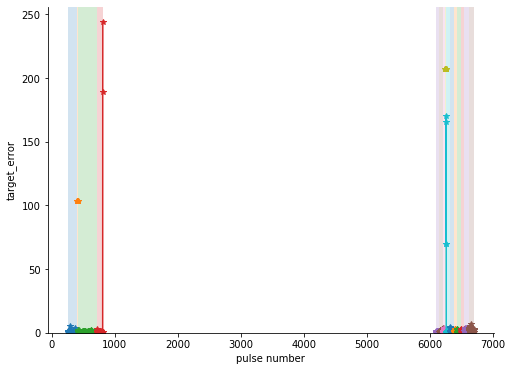

In [44]:
chunks = chunk_samples(stim_samples, thr=50)
plot_chunks(chunks)

In [45]:
chunks[2]

,sample_name,session_name,index,assoc_target,loc_x,loc_y,loc_z,m0n0,m0n1,m0n2,...,angular_error,twist_error,stim_power,date,time,creation_cause,crosshairs_driver,offset,comment,emg_channels
409,Sample 410,Session 1,410,L_LDLPFC,-176.849,138.802,278.08,0.57,-0.59,0.572,...,44.251,31.763,(null),2018-07-27,15:59:13.023,TTL2,Snazzy Coil,0.0,(null),(null)
410,Sample 411,Session 1,411,L_LDLPFC,-176.849,138.802,278.08,0.57,-0.59,0.572,...,44.251,31.763,(null),2018-07-27,15:59:13.134,TTL2,Snazzy Coil,0.0,(null),(null)
411,Sample 412,Session 1,412,L_LDLPFC,-176.849,138.802,278.08,0.57,-0.59,0.572,...,44.251,31.763,(null),2018-07-27,15:59:36.658,TTL2,Snazzy Coil,0.0,(null),(null)
412,Sample 413,Session 1,413,L_LDLPFC,-176.849,138.802,278.08,0.57,-0.59,0.572,...,44.251,31.763,(null),2018-07-27,15:59:36.769,TTL2,Snazzy Coil,0.0,(null),(null)
413,Sample 414,Session 1,414,L_LDLPFC,-176.849,138.802,278.08,0.57,-0.59,0.572,...,44.251,31.763,(null),2018-07-27,15:59:40.760,TTL2,Snazzy Coil,0.0,(null),(null)
414,Sample 415,Session 1,415,L_LDLPFC,-176.849,138.802,278.08,0.57,-0.59,0.572,...,44.251,31.763,(null),2018-07-27,15:59:40.857,TTL2,Snazzy Coil,0.0,(null),(null)


## visualization of stimulations

In [32]:
targets.name

array(['L_LDLPFC', 'L_IPL', 'M1', 'V1_M1_1', 'V1_M1_2', 'V1_M1_3',
       'V1_M1_4', 'V1_M1_5', 'L_IPL_1', 'V1_M1_6', 'R_DLPFC', 'R_OCC',
       'V2_M1_1', 'V2_M1_2', 'F_OCC', 'F_RDLPFC', 'I_DAN', 'I_DMN',
       'C_DAN', 'C_DMN', 'ICA-DAN', 'ICA-DMN', 'V3_M1_1', 'v3_M1_2',
       'V4_m1_1', 'v4_m1_2', 'v4_m1_3', 'v4_m1_4', 'v4_m1_5', 'V5_M1_1',
       'V5_M1_2', 'V5_M1_3', 'V5_M1_4', 'V5_M1_5', 'V6_m1_1', 'V6_m1_2'],
      dtype=object)

In [35]:
names_to_plot = ['L_LDLPFC','L_IPL','M1','C_DMN']

### subseting targets based on name 
targets_to_plot = targets.subset('name',names_to_plot)

In [36]:
p = plotting_points(targets_to_plot,hemi='both',surf='white',
                show_roi=True,show_name=True,scale_factor=1,name_scale=4,
                opacity=1,annot='Yeo2011_7Networks_N1000',show_directions=True)


p.brain.save_imageset('sample_',views=['dor','med','lat'])
p.show()

head model exists!


![title](sample__dor.png)